# Biggest New York Lotteries In History

In the summer of 2016 the New York Lottery's Power ball jack pot reached over 1-billion and the New York Megamillions reached 1.6 Billion dollars. Most people i knew brought a ticket 

I didn’t because I knew my chances of winning where incredibly slim. As a mathematician I calculated the odds of winning with the choice $5$ of $69$ white balls and $1$ of $26$ red balls the chance of winning the entire jack pot 
$$\text{Probability of a winning ticket}  =\frac{\text{unique ticket number}}{\text{number of possible ticket combiations}}$$

$$ \frac{1}{\text{combinations of 5 regular balls} *\text{combinations of 1 power ball}}= $$

$$\frac{1}{{69 \choose 5} *{26 \choose 1}} = \frac{1}{292,201,338}. $$
 for the megamillions the probility of a winning ticket is 
$$\frac{1}{{70 \choose 5} *{25 \choose 1}} = \frac{1}{302,575,350}.$$




After the jackpot had been won. I wasn’t surprised that nobody that I knew didn’t win but I still thought about whether or not it was possible to win the lottery using mathematics. I took a cryptography class in my undergrad and at the end of a lecture my professor told the class that there were some people who sat at a bar and figured it out about 20 years ago. I guess that was at the back of my mind when I went to get carbonated water from a local gas station there I noticed that Quick draw wasn’t a physical drawing and that it was computer generated. I had once heard that computer can’t really make completely random sequences because the sequences created are algorithm based. So I thought what if I use a computer to find some pattern in previous numbers to predict the next sequence of numbers. And thus I started this small project.


# Odds of Winning Quick Draw and Win 4

In additon to the quick draw lotto I also looked at Win4 which is also computer generated. First thinking about the odds of the game we must think about how the game is played. There are 20 number chosen from form 1-80 this means that the number of unique combinations of the numbers for quickdraw are


$${80\choose 20} = \frac{80!}{20!(80-20)!} = 3.5353161*10^{18}$$

this is about 3.5 quintillion combinations. Thats alot of combinations but you only need to get 10 numbers correct to win the jackpot of $100,000. The odd of you picking one corrct number is 20/80 continuing on the odds of you picking 10 correct numbers is 

$$\left(\frac{20}{80}\right)\left(\frac{19}{79}\right)\dots\left(\frac{10}{70}\right) = \frac{17}{1,060,493,630}$$

For the Win4 game the odds are different 4 numbers are chosen out of 10 but the numbers can repeat in a sequence so the tnumber of possible winning numbers is  

$$10^4= 10,000$$
Which in all honest isn alot of possble numbers but the pay max payout for this lottery isn't that large it is only $5000


## Collecting/ Parsing the Data

   I collected the winning numbers for quick draw and Win4 In a very crude way. First, I went to the New York State Lottery website https://nylottery.ny.gov/ then I sellected all the numbers and then just copy pasted the numbers into an the text editor Notepad. I knew that this would allow me to read the numbers individually in Python. I created the funtion $\textit{Punctuation}$ to get rid of the dashes $\text{('-')}$ between the numbers and replace them with spaces $\text('~~')$. Having the Indivdiual numbers seperatated I could then count and plot numbers in a bar graph this is taken care of by the funtion $\textit{plot_bar}$. A bar graph wpuld allow me to see the distribution of the numbers and see if the numbers are really random.

In [19]:
%pylab inline
from collections import Counter # creates dictionaries that counts the number of times a key occurs
from operator import itemgetter

Populating the interactive namespace from numpy and matplotlib


In [17]:
def load_book(filename):
    fp = open(filename)#places "Numbers" in a file 
    res = fp.read()
    fp.close()
    return res #return what was read
def Punctuation(x):
    punctuation = '-'
    for char in punctuation: # removes Punctuation
        x  = x.replace(char,' ')
    return (x)
def number_counter(numbers):
    numbercount = {}# dictionary that holds all the words as keys
    for number in numbers:
        if number in numbercount:
            numbercount[number]+=1
        else:
            numbercount[number] = 1
    return numbercount
def get_count(x):
    return x[1]
def plot_bar(filename,scale):
    data = load_book(filename)
    data = Punctuation(data)
    numbers = data.split()
    numbers.sort()
    counter = number_counter(numbers);
    #sorted_words = sorted(counter.items(),key = get_count,reverse=True)
    #counts = [pair[1] for pair in sorted_words]
    
    figure(figsize=(20,5))
    
    c = list(Counter(numbers).items())
    #c.sort(key=itemgetter(1))
    labels, values = zip(*c)
    
    indexes = arange(len(labels))
    width = 0.8
    
    bar(indexes, values, width)
    xticks(indexes + width * 0.5, labels)
    
    #ticks = [width/2 + i for i in range(81)] 
    #bar(range(80), freqs, fc='c', ec='b') 
    #xticks(ticks, number) 
    ylim(0, scale) 
    title('QDdistro') 
    xlabel('Numbers') 
    ylabel('Frequency') 
    return show() 

# Frequency for a Given Month 

## Checking If the computer Generated Numbers are really Ramdom

So first I'd like to see how to pick my first number for quick draw and I like to see if there are any biases toward a specific number that will allow me to chose the number with the most chances of being correct. Although as you can see below ploting the data

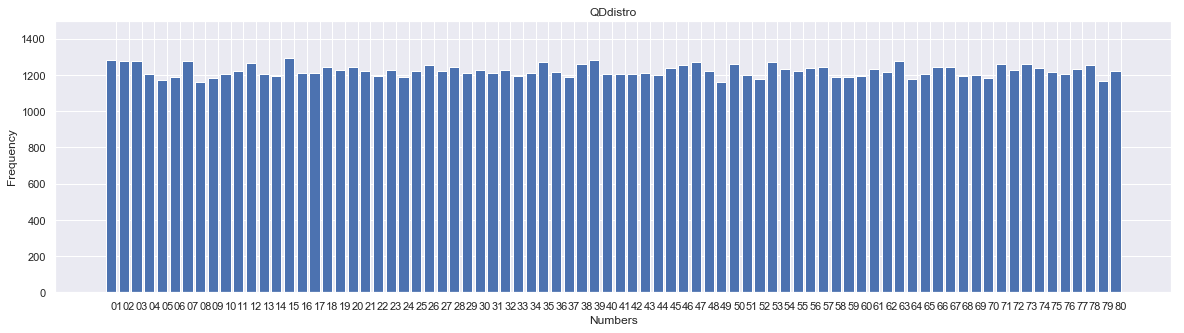

In [27]:
plot_bar("QuickDraw(dec).txt",1500) #this plots the distribution of numbers for  the month of Dec 2016

# Freqency of a given Number over a month period

Coming Back to this porject after a few years I have a few new tricks to do some exploratory data analysis. One of those tricks comes in of the form of the following packages.

In [10]:
import pandas as pd
import seaborn as sns
sns.set()

In [11]:
#data = pd.read_csv("lotterydec2016")

One of things that I wanted to explore but could not a few years ago what the relationship between the freqency of the numbers since the numbers are computer generated the there must be an algorthim that makes sure that the distrubution of the the numbers remains undecernable. I figure that if one number has too large of a count then 

In [22]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(*args, **kwds)
 |  
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          #